# Family Classification with Decision Trees
 
 * I don't see how random forests help here. We are not interested in the classification per se, only in what we can learn from the classification rules. So in any event, we can only look at one tree at a time, and even that maybe a little too complicated. 
 
 
 * (1) Shows a few examples with WO featues alone 
     
 
 * (2) Shows a few without WO 
 
 
 * The classification is far from perfect. If we want to pursue the decision trees method, we have to develop a procedure for searching for interesting trees &mdash; in that maybe a random forest could help. 
 
 
 * In these exmples, it doesn't seem that WO separates better; Consider only the trees with 3 famileis: In [7] &mdash; only word order, In [16] &mdash; no word order.


In [1]:
library(rpart)
library(rpart.plot)
wals <- read.csv('wals.csv')
binwals <- read.csv('binarized-wals.csv')

In [2]:
colnames(wals) <- sub("(X[0-9]+[A-Z])(.*)","\\1",colnames(wals))
binwals$X <- NULL

# 1. Only Word Order
## Search Criteria:
 - Word Order only
 - At least 65 languages in most frequent family
 - At least count(top-family) * 0.7 languages in the second and third families

## Maximal Feature Groups that Meat These Criteria:

In [3]:
g1 = c('143A', '143E', '143F', '143G', '82A', '83A', '89A') 
g2 = c('143A', '143E', '143F', '143G', '83A', '89A')

In [4]:
chunk_wals <- function(cols,supp) {
    cols <- unlist(lapply(cols,function(f){paste('X',f,sep="")}))
    wals[rowSums(binwals[,cols]) >= length(cols),c(cols,supp)]
}

In [5]:
example1 = chunk_wals(g1,'family')
head(summary(example1$family))

Austronesian      Niger-Congo     Sino-Tibetan     Afro-Asiatic 
             135              116               97               59 
   Indo-European Trans-New Guinea 
              56               43

In [6]:
exampletree <- function(langs,wals_chunk,cp=0.01,minsplit=8) {
    dat <- wals_chunk[wals_chunk$family %in% langs,]
    dat$family <-  droplevels(dat$family)
    dat <- lapply(dat,as.factor)
    tree <- rpart(family ~ ., data = dat,control=c(minsplit=minsplit,cp=cp),method='class')
    tree
}
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan'),example1)

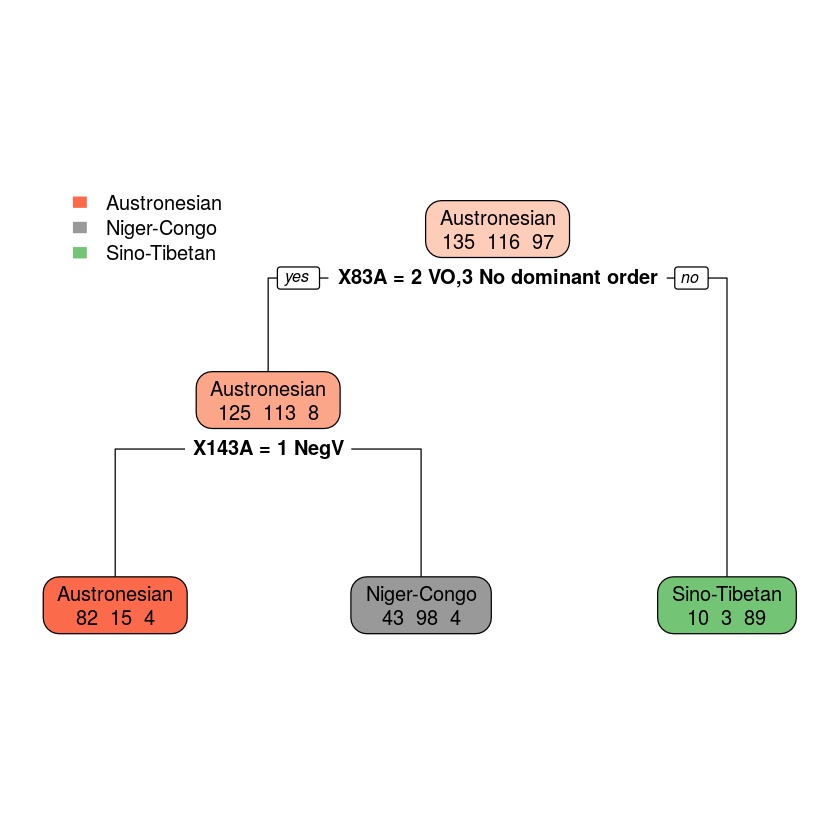

In [7]:
rpart.plot(tree,extra = 1)

In [8]:
example2 = chunk_wals(g2,'family')
head(summary(example2$family))

Austronesian      Niger-Congo     Sino-Tibetan     Afro-Asiatic 
             135              119               97               61 
   Indo-European Trans-New Guinea 
              56               43

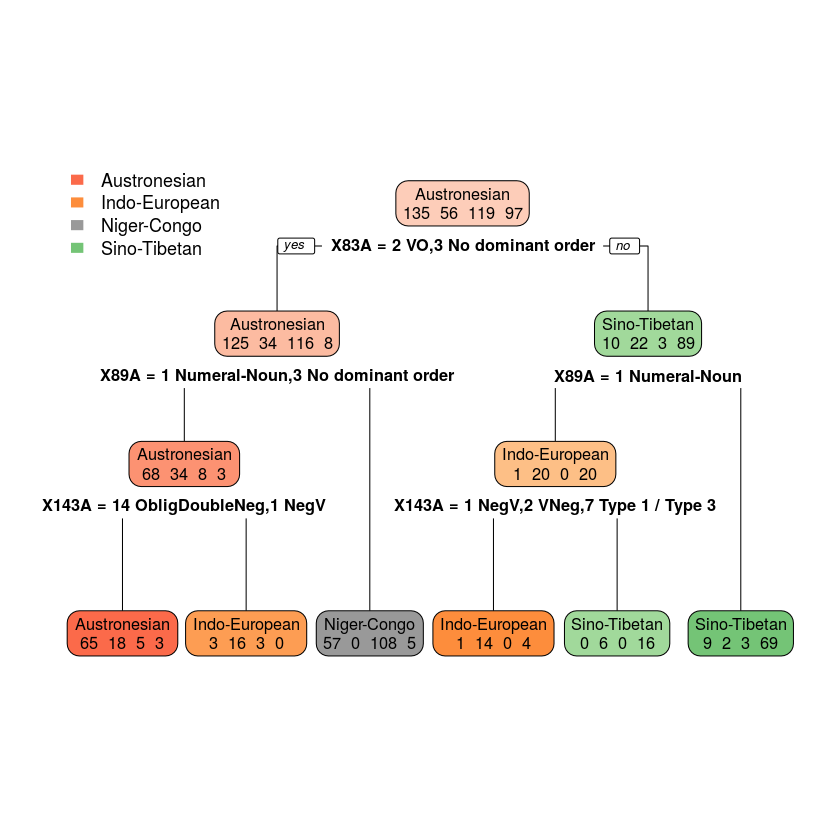

In [9]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Indo-European'),example2)
rpart.plot(tree,extra = 1)

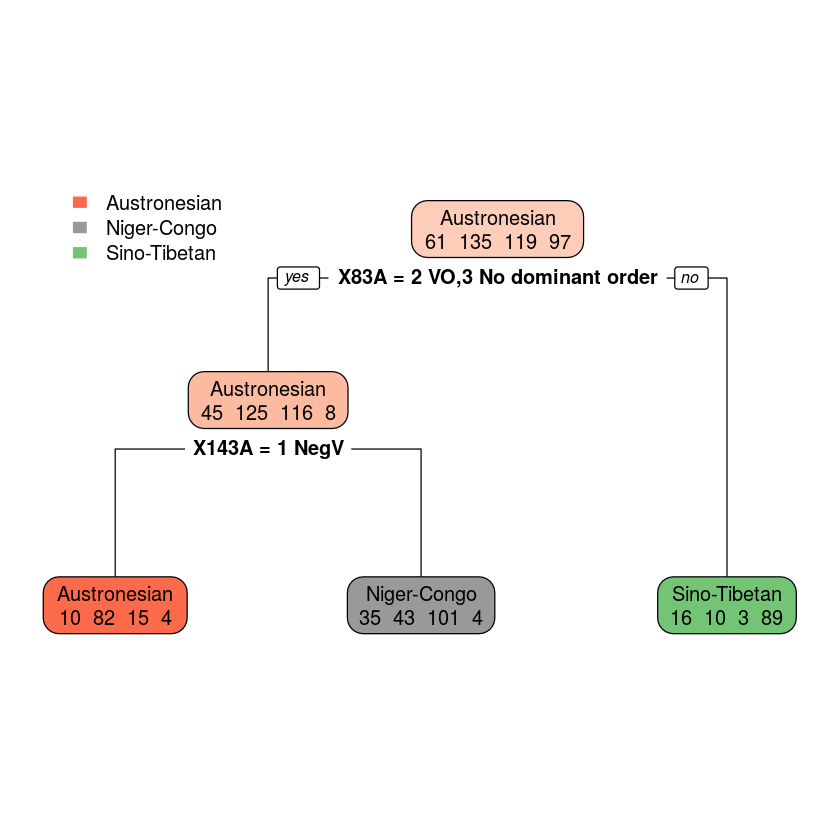

In [10]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example2)
rpart.plot(tree,extra = 1)

# 2. No Word Order

## Search Criteria:
 - Word Order not included
 - At least 65 languages in most frequent family
 - At least count(top-family) * 0.8 languages in the second, third and fourth families

## Maximal Feature Groups that Meat These Criteria:

In [11]:
g3 = c('112A', '116A', '26A', '33A', '69A')
g4 = c('112A', '116A', '33A', '69A')

In [12]:
example3 = chunk_wals(g3,'family')
head(summary(example3$family))

Austronesian     Sino-Tibetan      Niger-Congo     Afro-Asiatic 
              53               52               49               46 
   Indo-European Trans-New Guinea 
              40               24

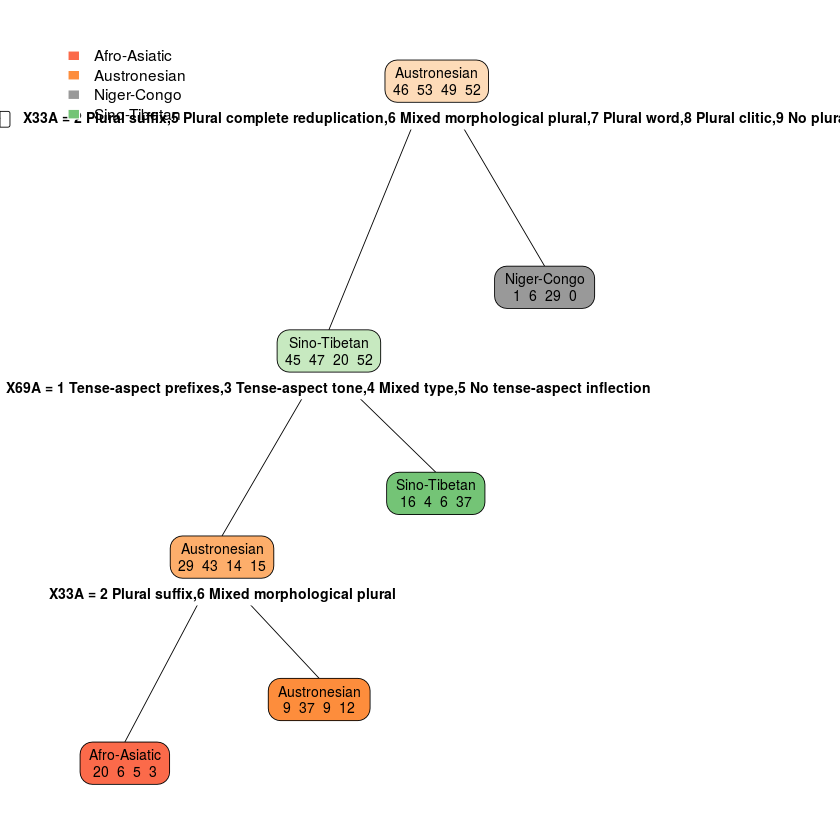

In [13]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example3,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1,tweak=0.7,fallen=FALSE)

In [14]:
example4 = chunk_wals(g4,'family')
head(summary(example4$family))

Austronesian     Sino-Tibetan      Niger-Congo     Afro-Asiatic 
              54               54               53               47 
   Indo-European Trans-New Guinea 
              41               26

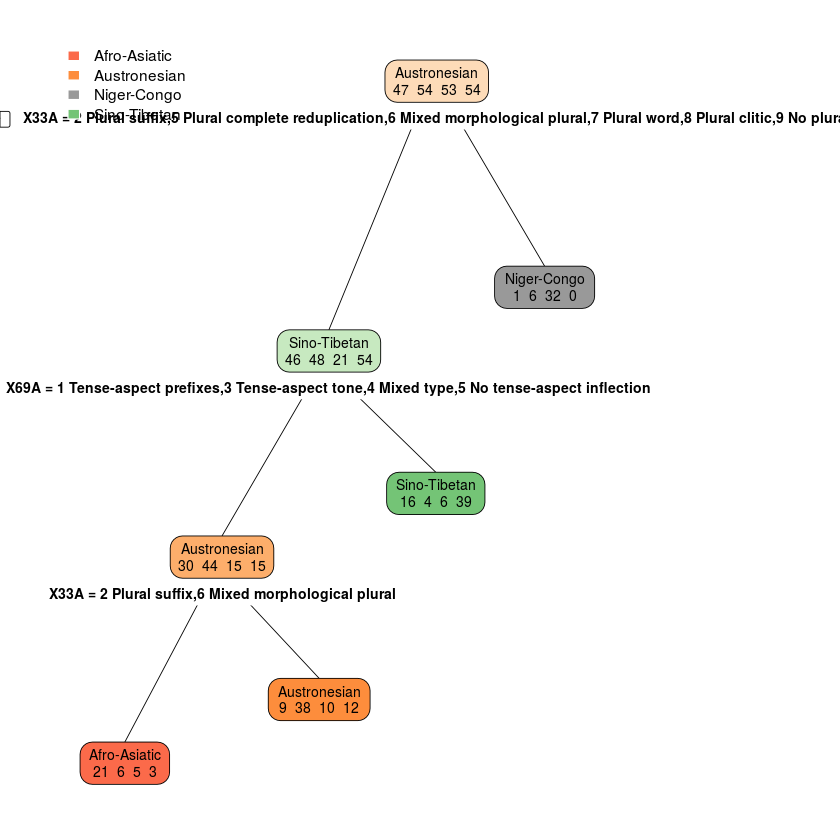

In [15]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan','Afro-Asiatic'),example4,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1,fallen=FALSE,tweak=0.7)

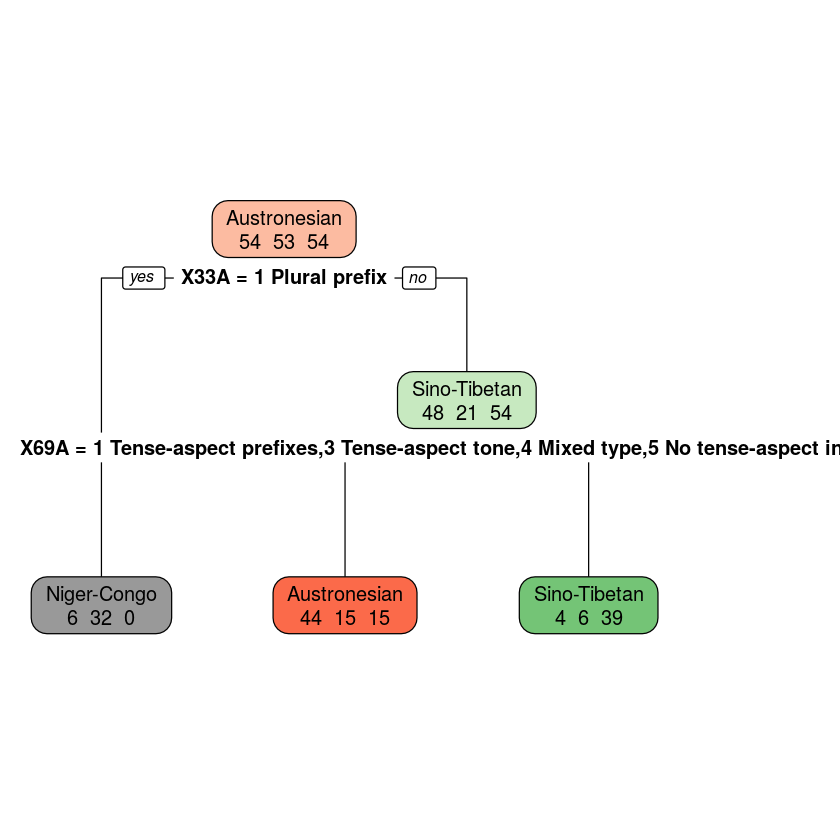

In [16]:
tree <- exampletree(c('Austronesian','Niger-Congo','Sino-Tibetan'),example4,minsplit=12,cp=0.05)
rpart.plot(tree,extra = 1)